## Budgets

In [1]:
# abrir bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

In [2]:
budgets = pd.read_csv('C:/Users/afilg/OneDrive/Área de Trabalho/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/Dados/Budget_Numbers1.csv', sep = ';')
budgets.head().T

,0,1,2,3,4
Item,1,2,3,4,5
Mês,Abril,Maio,Abril,Dezembro,Abril
Mes (numeral),4,5,4,12,4
Dia,23,20,22,16,25
Ano,2019,2011,2015,2015,2018
Data Portugues,23/04/2019,20/05/2011,22/04/2015,16/12/2015,25/04/2018
FW,17,20,17,51,17
Movie,Avengers: Endgame,Pirates of the Caribbean: On Stranger Tides,Avengers: Age of Ultron,Star Wars Ep. VII: The Force Awakens,Avengers: Infinity War
Production Budget,400000000,379000000,365000000,306000000,300000000
Worldwide Gross,2797800564,1045663875,1396099202,2068223624,2048359754


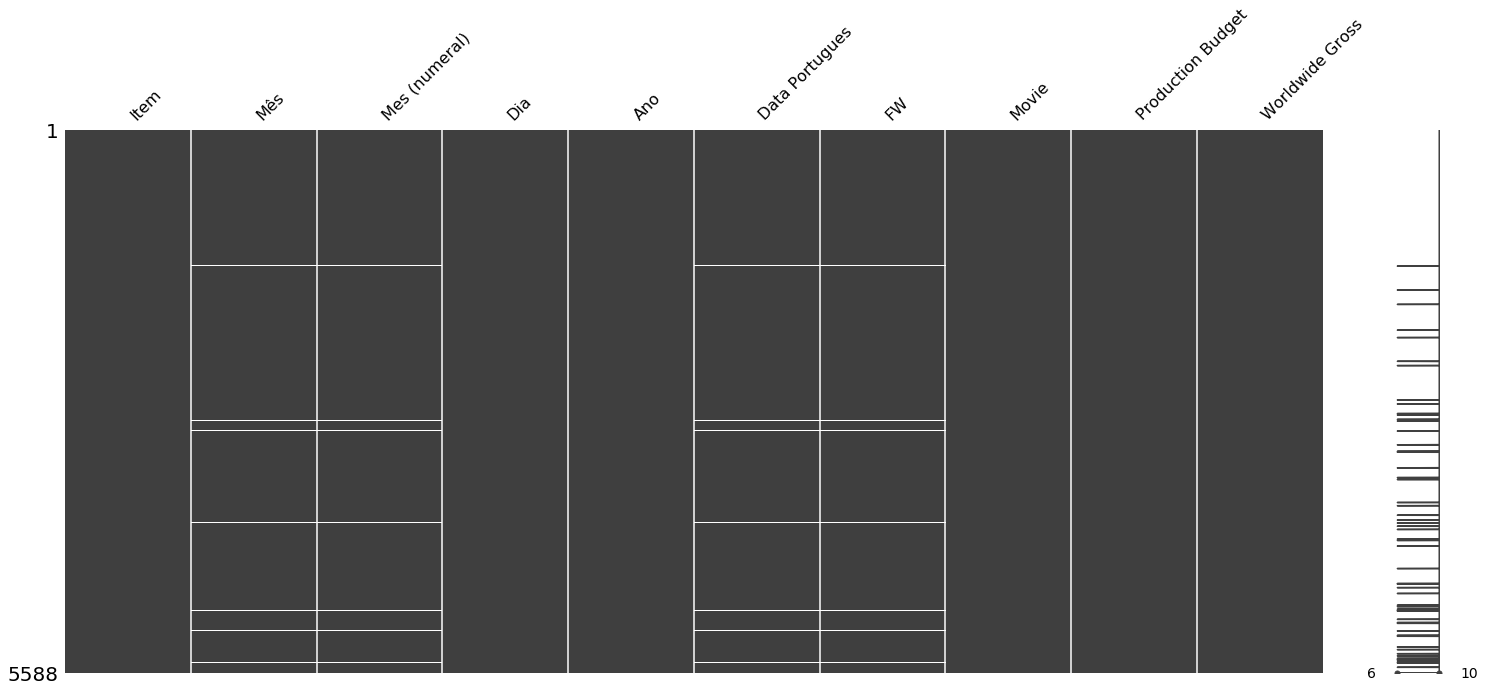

In [3]:
import missingno as msno
%matplotlib inline
msno.matrix(budgets)

In [4]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5588 entries, 0 to 5587
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               5588 non-null   int64  
 1   Mês                5528 non-null   object 
 2   Mes (numeral)      5528 non-null   float64
 3   Dia                5588 non-null   object 
 4   Ano                5588 non-null   int64  
 5   Data Portugues     5528 non-null   object 
 6   FW                 5528 non-null   object 
 7   Movie              5588 non-null   object 
 8   Production Budget  5588 non-null   object 
 9   Worldwide Gross    5588 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 436.7+ KB


In [5]:
budgets['Worldwide_Gross'] = budgets['Worldwide Gross'].astype(float)

In [6]:
budgets['Production_Budget'] = budgets['Production Budget'].astype(float)

In [7]:
budgets = budgets.drop(['Worldwide Gross','Production Budget'], axis = 1)

In [8]:
budgets.head().T

,0,1,2,3,4
Item,1,2,3,4,5
Mês,Abril,Maio,Abril,Dezembro,Abril
Mes (numeral),4,5,4,12,4
Dia,23,20,22,16,25
Ano,2019,2011,2015,2015,2018
Data Portugues,23/04/2019,20/05/2011,22/04/2015,16/12/2015,25/04/2018
FW,17,20,17,51,17
Movie,Avengers: Endgame,Pirates of the Caribbean: On Stranger Tides,Avengers: Age of Ultron,Star Wars Ep. VII: The Force Awakens,Avengers: Infinity War
Worldwide_Gross,2.7978e+09,1.04566e+09,1.3961e+09,2.06822e+09,2.04836e+09
Production_Budget,4e+08,3.79e+08,3.65e+08,3.06e+08,3e+08


In [9]:
budgets.describe().round(2)

,Item,Mes (numeral),Ano,Worldwide_Gross,Production_Budget
count,5588.00,5528.00,5588.00,5.588000e+03,5.588000e+03
mean,2794.50,6.98,2004.15,9.942184e+07,3.351692e+07
std,1613.26,3.40,12.51,1.856424e+08,4.228866e+07
min,1.00,1.00,1915.00,1.700000e+01,1.100000e+03
25%,1397.75,4.00,2000.00,7.584521e+06,6.500000e+06
50%,2794.50,7.00,2007.00,3.350455e+07,1.900000e+07
75%,4191.25,10.00,2013.00,1.051176e+08,4.200000e+07
max,5588.00,12.00,2020.00,2.797801e+09,4.000000e+08


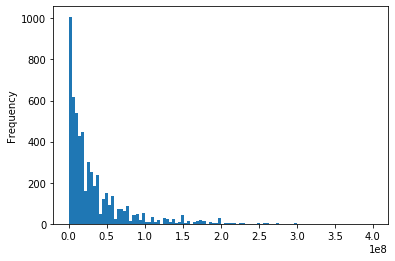

In [10]:
budgets.Production_Budget.plot.hist(bins = 100)

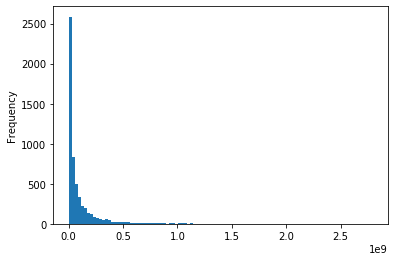

In [11]:
budgets.Worldwide_Gross.plot.hist(bins = 100)

In [12]:
budgets['rentability'] = budgets['Worldwide_Gross']/budgets['Production_Budget']

In [13]:
budgets.rentability.describe()

count    5588.000000
mean        4.896665
std        29.195165
min         0.000002
25%         0.706626
50%         1.883606
75%         3.955852
max      1800.000000
Name: rentability, dtype: float64

In [14]:
budgets['log_rentability'] = np.log(budgets['rentability'])

In [15]:
budgets.log_rentability.describe()

count    5588.000000
mean        0.322937
std         1.791613
min       -12.997200
25%        -0.347255
50%         0.633188
75%         1.375196
max         7.495542
Name: log_rentability, dtype: float64

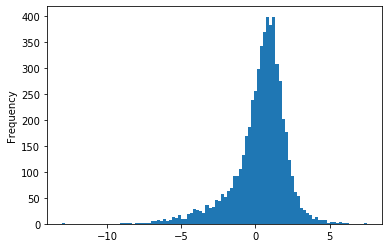

In [16]:
budgets.log_rentability.plot.hist(bins = 100)

In [17]:
budgets = budgets.rename(columns={"Ano": "year", "Mes (numeral)": "month",'Dia':'day' })

In [18]:
budgets['day'] = budgets['day'].astype(float)

In [19]:
budgets['lancamento'] = pd.to_datetime(budgets[['year', 'month', 'day']], dayfirst=True)

In [20]:
budgets.lancamento.head()

0   2019-04-23
1   2011-05-20
2   2015-04-22
3   2015-12-16
4   2018-04-25
Name: lancamento, dtype: datetime64[ns]

In [21]:
budgets['movieyear'] = budgets.year.astype(str) + budgets.Movie

In [22]:
budgets = budgets

In [23]:
basics = pd.read_csv('C:/Users/afilg/OneDrive/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/basics.csv')

In [ ]:
import difflib

tqdm.pandas()

budgets['movieyear_id'] = budgets['movieyear'].progress_apply(lambda x: (difflib.get_close_matches(x, basics['movieyear'])[:1] or [None])[0])


C:\Users\afilg\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
